In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib notebook

plt.style.use('pretty')

In [4]:
from insilicoexperiments import NDNF_SOM_PC

In [5]:
colSOM = '#4084BF'
colNDNF = '#EF8961'

In [6]:
def experiment2_invivo_sensory_stim(bg_SOM=0, bg_NDNF=0.5, alphaS=0, alphaN=1, expS=1., tau_stim=100, save=False):

    dpi = 300 if save else 150

    dur = 1200
    dt = 1
    t = np.arange(0, dur, dt)

    tau1 = 150
    tau2 = 50
    ts = 400
    act_on = 400
    act_off = 700

    # act_on, act_off = 300, 700

    fig, ax = plt.subplots(3, 1, dpi=dpi, figsize=(4, 3), sharex=True, gridspec_kw={'bottom': 0.12})
    plt.suptitle("Sensory stimulation & Ca-imaging 'in-vivo' (Abs18, F5G)", fontsize=10)
    ax[0].set(ylabel='NDNF act. (au)', yticks=[0, 1], ylim=[0, 2])
    ax[1].set(ylabel='SOM act. (au)', ylim=[0, 2])
    ax[2].set(ylabel='stimulus (au)', xlabel='time (ms)')

    @widgets.interact(wNS=(0, 2, 0.2), alphaN=(0, 2, 0.1), ba=(0, 1, 1), nS=(0.5, 2, 0.25), nN=(0.5, 2, 0.25),
                      U_S=(0, 0.5, 0.1), bg_SOM=(0, 1, 0.1), bg_NDNF=(0, 1, 0.1), tau1=(0.01, 200, 10), tau2=(0.01, 100, 10),
                      b=(0, 0.5, 0.1), wNN=(0, 1, 0.2), U_N=(0.5, 1, 0.1), expN=(0.1, 1.5, 0.1))
    def update(wNS=1, alphaN=1, ba=1, nS=1, nN=1, U_S=0, bg_SOM=0, bg_NDNF=0.5, tau1=150, tau2=50, b=0.3, wNN=0.5, U_N=1,
               expN=0.3):

        # remove old lines
        for ii in range(3):
            [l.remove() for l in ax[ii].lines]
            [l.remove() for l in ax[ii].lines]
            [l.remove() for l in ax[ii].lines]

        xff_list = [1, 2, 3, 4]
        model = NDNF_SOM_PC(wNS=wNS, ba=ba, U_S=U_S, alphaN=alphaN, b=b, r0=0, wNN=wNN, U_N=U_N, expN=expN)
        model.tfS['n'] = nS
        model.tfN['n'] = nN

        for i, xff in enumerate(xff_list):
            t = np.arange(0, dur, dt)
            

            # construct feedforward input
            sensory_stim = 2 * np.maximum(xff * (np.exp(-(t - ts) / tau1) - np.exp(-(t - ts) / tau2)), 0)

#             sensory_stim = np.zeros(int(dur/dt))
#             sensory_stim[400:800] = xff
#             sensory_stim[act_on:act_off] = xff*(1-np.exp(-(t[act_on:act_off]-act_on)/tau2))
#             sensory_stim[act_off:] = sensory_stim[act_off-1]*np.exp(-(t[act_off:]-act_off)/tau1)

            t, rE, rN, rS, p = model.run(dur, bg_NDNF, bg_SOM, xFF=sensory_stim)

            ax[0].plot(t, rN, c=colNDNF, alpha=(i+1)/len(xff_list))
            ax[1].plot(t, rS, c=colSOM, alpha=(i+1)/len(xff_list))
            # ax[2].plot(t, rE, c='C3', alpha=(i+1)/len(xff_list))
            ax[2].plot(t, sensory_stim, c='#9B3146', alpha=(i+1)/len(xff_list))
            
    plt.show()


<IPython.core.display.Javascript object>


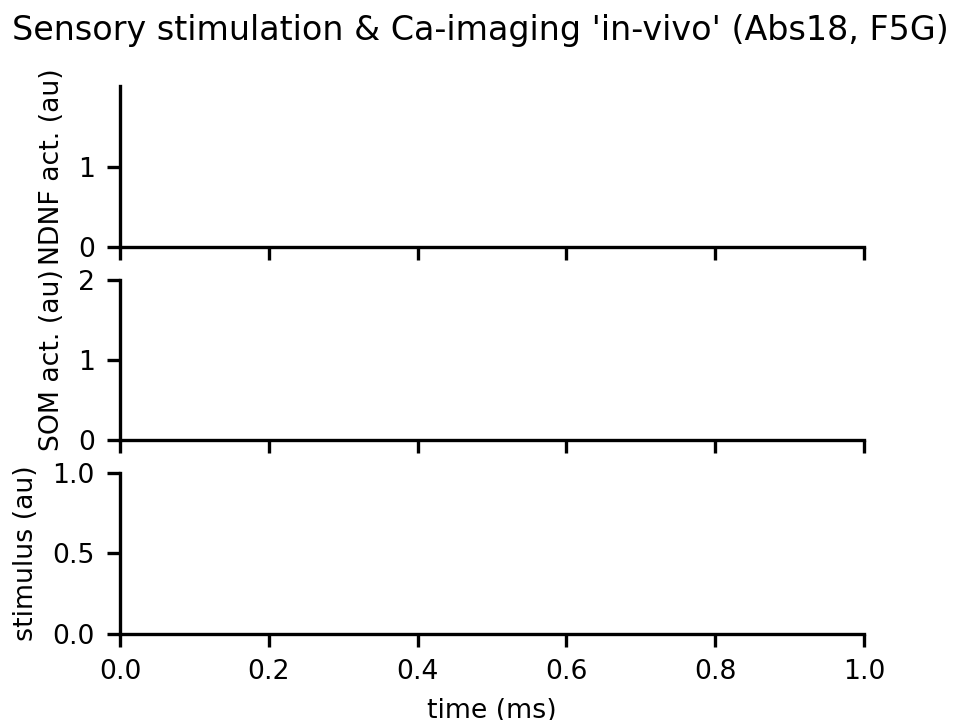

interactive(children=(FloatSlider(value=1.0, description='wNS', max=2.0, step=0.2), FloatSlider(value=1.0, des…

In [7]:
experiment2_invivo_sensory_stim()

<IPython.core.display.Javascript object>


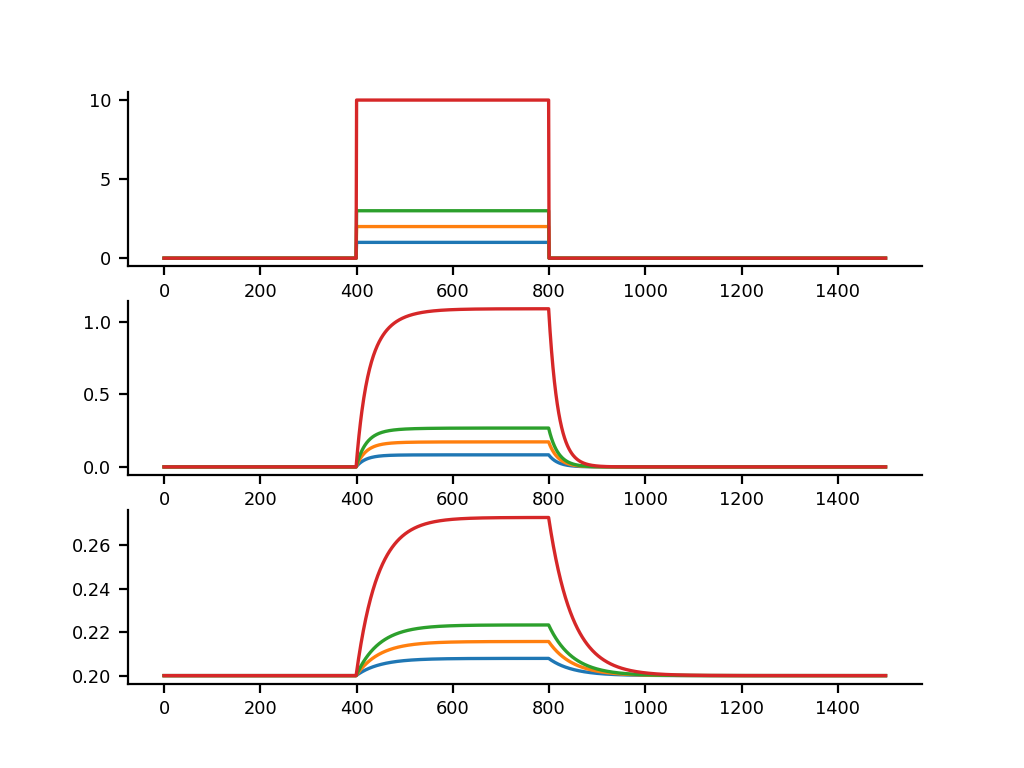

In [6]:
# testing STP in a rate model

fig, ax = plt.subplots(3, 1)

for ss in [1, 2, 3, 10]:
    dt = 1
    t = np.arange(0, 1500, dt)
    x = np.zeros(len(t))
    x[400:800] += ss
    y = 0

    U = 0.2
    h = U
    taud = 50
    taum = 20
    w = 2

    ystore = []
    hstore = []

    for i in range(len(t)):

        y += (-y + w*U*h*x[i])/taum*dt
#         h += ((-U*x[i]*h)/1000 + (1-h)/taud)*dt
        h += ((U-h)/taud + U*(1-h)*x[i]/1000)*dt

        ystore.append(y)
        hstore.append(h)


    ax[0].plot(t, x)
    ax[1].plot(t, ystore)
    ax[2].plot(t, hstore)
plt.show()

<IPython.core.display.Javascript object>


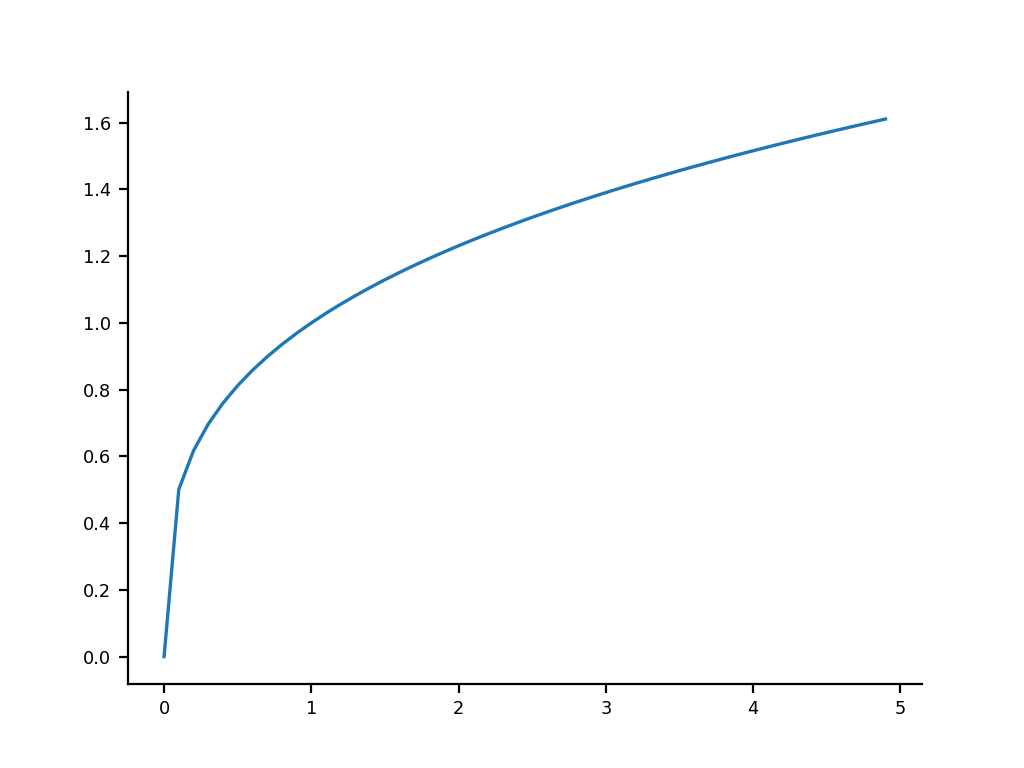

In [10]:
x = np.arange(0, 5, 0.1)
y = x**0.3
plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


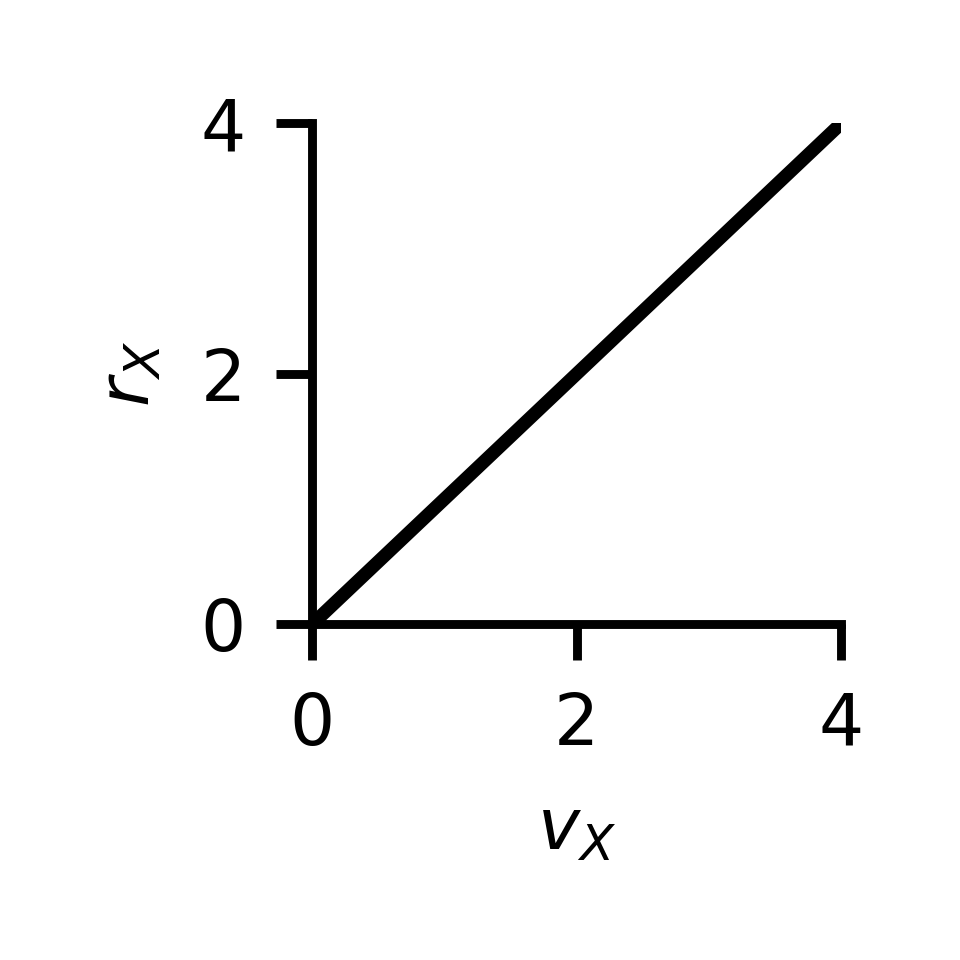

In [16]:
fig, ax = plt.subplots(1, 1, dpi=400, figsize=(1.5, 1.5))
x = np.arange(0, 5, 0.1)
ax.plot(x, (np.maximum(x-0, 0))**1, c='k')
ax.set(xlabel=r'$v_X$', ylabel=r'$r_X$', xlim=[0, 4], ylim=[0, 4], yticks=[0, 2, 4])
plt.tight_layout()
plt.show()